Import all the needed stuff and define the GMM classifier class.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.mixture import GMM

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

import GMMcl

Now run the GMM classifier in the same way that the SVM classifier is run, and show the two side-by-side.

In [2]:
svc = svm.SVC(kernel='linear', C=1.0).fit(X, y)
gmmcl = GMMcl.GMMcl(n_components=3).fit(X, y)

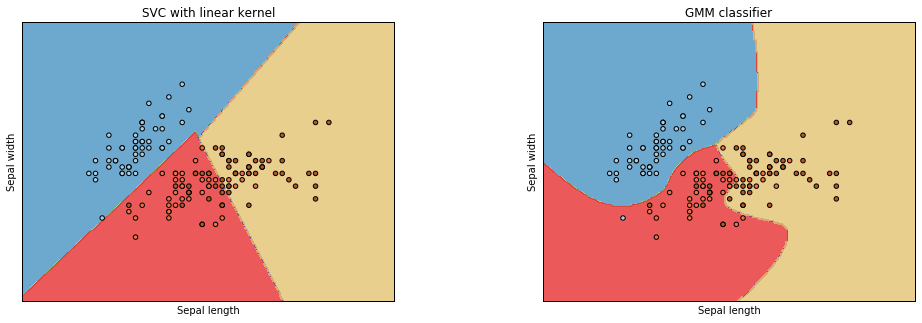

In [3]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',
          'GMM classifier']

plt.figure(figsize=(16, 5))

for i, clf in enumerate((svc, gmmcl)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
plt.show()